## NFL Passing Plots and Heatmaps

### Import neccesary modules

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

### Read in dataframe

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ArrowheadAnalytics/next-gen-scrapy-2.0/master/pass_and_game_data.csv', index_col=0)

In [5]:
df.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,...,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
posteam,,,,,,,,,,,,,,,,,,,,,
ARI,10,Kyler Murray,COMPLETE,7.567394,-3.016650,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-15.303610,-1.567681,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,16.040816,3.505631,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,-2.252197,4.390257,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF
ARI,10,Kyler Murray,COMPLETE,25.880476,6.894967,2020,2020_10_BUF_ARI,REG,2020-11-15,Sunday,...,NaN,NaN,NaN,NaN,Sean McDermott,Kliff Kingsbury,NaN,PHO00,State Farm Stadium,BUF


### Unique years in dataframe

In [6]:
df['season'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

### Dataframe only for the 2020 season

In [179]:
df_2020 = df.loc[df['season'] == 2020]

### Filter out data for only Patrick Mahomes

In [11]:
mahomes_20 = df_2020.loc[df_2020['name'] == 'Patrick Mahomes']

mahomes_20.head()

,week,name,pass_type,x,y,season,game_id,game_type,gameday,weekday,...,roof,surface,temp,wind,away_coach,home_coach,referee,stadium_id,stadium,defteam
posteam,,,,,,,,,,,,,,,,,,,,,
KC,1,Patrick Mahomes,COMPLETE,8.416995,6.525715,2020,2020_01_HOU_KC,REG,2020-09-10,Thursday,...,outdoors,NaN,NaN,NaN,Bill O'Brien,Andy Reid,NaN,KAN00,Arrowhead Stadium,HOU
KC,1,Patrick Mahomes,COMPLETE,-16.797805,0.987817,2020,2020_01_HOU_KC,REG,2020-09-10,Thursday,...,outdoors,NaN,NaN,NaN,Bill O'Brien,Andy Reid,NaN,KAN00,Arrowhead Stadium,HOU
KC,1,Patrick Mahomes,COMPLETE,-3.654530,-3.022539,2020,2020_01_HOU_KC,REG,2020-09-10,Thursday,...,outdoors,NaN,NaN,NaN,Bill O'Brien,Andy Reid,NaN,KAN00,Arrowhead Stadium,HOU
KC,1,Patrick Mahomes,COMPLETE,19.232292,6.009917,2020,2020_01_HOU_KC,REG,2020-09-10,Thursday,...,outdoors,NaN,NaN,NaN,Bill O'Brien,Andy Reid,NaN,KAN00,Arrowhead Stadium,HOU
KC,1,Patrick Mahomes,COMPLETE,-10.418292,-5.161233,2020,2020_01_HOU_KC,REG,2020-09-10,Thursday,...,outdoors,NaN,NaN,NaN,Bill O'Brien,Andy Reid,NaN,KAN00,Arrowhead Stadium,HOU


In [13]:
mahomes_20['pass_type'].unique()

array(['COMPLETE', 'TOUCHDOWN', 'INCOMPLETE', 'INTERCEPTION'],
      dtype=object)

### Plot Patrick Mahomes Completion

Text(0.5, 1.0, 'Patrick Mahomes Completed Passes')

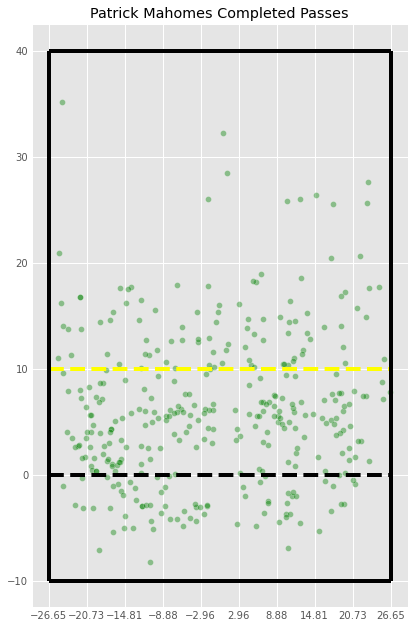

In [180]:
# filter out only complete passes
complete = mahomes_20.loc[mahomes_20['pass_type'] == 'COMPLETE']

# use the ggplot base styling for our visualization
plt.style.use('ggplot');

# set the fig size to look like a football field
fig, ax = plt.subplots(figsize=(6, 10))

# scatter plot the x_coord and y_coord
ax.scatter(x=complete['x'], y=complete['y'], color='green', alpha=0.4, edgecolors='white');

# a football field is roughly 53.3 yards wide.
ax.set_yticks(np.arange(-20, 60, 10));
ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 10))

# the line of scrimmage is a line going across the field where x = 0
ax.hlines(0, -53.3/2, 53.3/2, color='black', linestyles='dashed')

# 10 yards to signify first down
ax.hlines(10, -53.3/2, 53.3/2, color='yellow', linestyles='dashed')

# Plot an out of bonds line for the football field
plt.plot([-53.3/2,53.3/2],[40,40], color="black")
plt.plot([-53.3/2,53.3/2],[-10,-10], color="black")
plt.plot([-53.3/2,-53.3/2],[-10,40], color="black")
plt.plot([53.3/2,53.3/2],[-10,40], color="black")

plt.title('Patrick Mahomes Completed Passes')

### Plot Baker Mayfield Completions

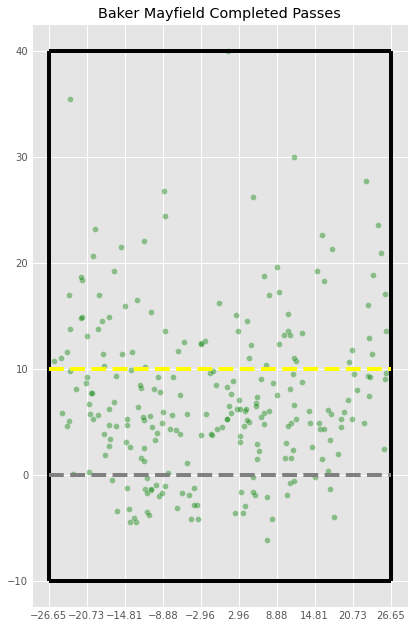

In [181]:
mayfield_20 = df_2020.loc[df_2020['name'] == 'Baker Mayfield']
complete = mayfield_20.loc[mayfield_20['pass_type'] == 'COMPLETE']

plt.style.use('ggplot');

fig, ax = plt.subplots(figsize=(6, 10))
ax.scatter(x=complete['x'], y=complete['y'], color='green', alpha=0.4, edgecolors='white');
ax.set_yticks(np.arange(-20, 60, 10));
ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 10))

plt.plot([-53.3/2,53.3/2],[40,40], color="black")
plt.plot([-53.3/2,53.3/2],[-10,-10], color="black")
plt.plot([-53.3/2,-53.3/2],[-10,40], color="black")
plt.plot([53.3/2,53.3/2],[-10,40], color="black")

plt.plot

plt.title('Baker Mayfield Completed Passes')

ax.hlines(0, -53.3/2, 53.3/2, color='grey', linestyles='dashed')
ax.hlines(10, -53.3/2, 53.3/2, color='yellow', linestyles='dashed')

### Plot Baker Mayfield vs Patrick Mahomes completions

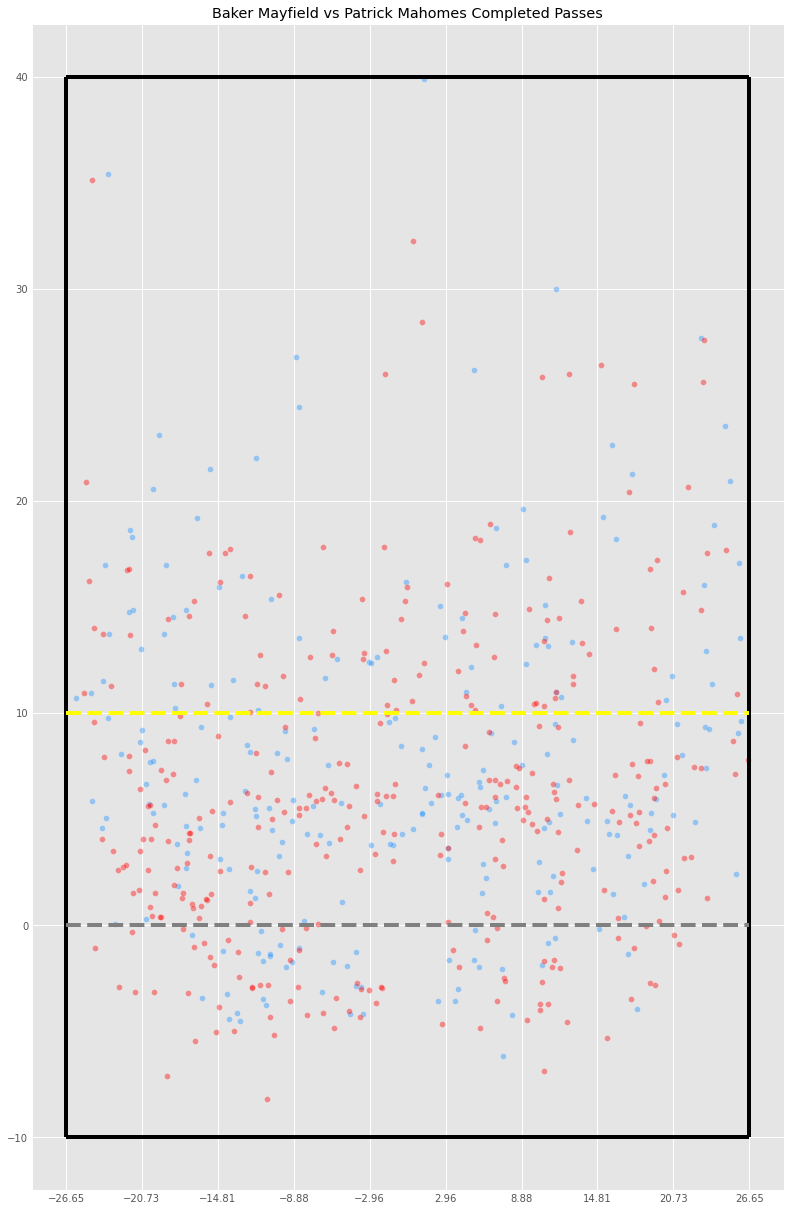

In [182]:
plt.style.use('ggplot');
fig, ax = plt.subplots(figsize=(12, 20))

plt.plot([-53.3/2,53.3/2],[40,40], color="black")
plt.plot([-53.3/2,53.3/2],[-10,-10], color="black")
plt.plot([-53.3/2,-53.3/2],[-10,40], color="black")
plt.plot([53.3/2,53.3/2],[-10,40], color="black")


# BLUE - Mayfield
mayfield_complete = mayfield_20.loc[mayfield_20['pass_type'] == 'COMPLETE']
ax.scatter(x=mayfield_complete['x'], y=mayfield_complete['y'], color='dodgerblue', alpha=0.4, edgecolors='white');


# RED - Mahomes
mahomes_complete = mahomes_20.loc[mahomes_20['pass_type'] == 'COMPLETE']
ax.scatter(x=mahomes_complete['x'], y=mahomes_complete['y'], color='red', alpha=0.4, edgecolors='white');


ax.set_yticks(np.arange(-20, 60, 10));
ax.set_xticks(np.linspace(-53.3/2, 53.3/2, 10))

plt.title('Baker Mayfield vs Patrick Mahomes Completed Passes')

ax.hlines(0, -53.3/2, 53.3/2, color='grey', linestyles='dashed')
ax.hlines(10, -53.3/2, 53.3/2, color='yellow', linestyles='dashed')

### Define a function ot plot passes for any qb from 2017 to 2020

In [183]:
def plot_passes(player_name, year):
    player = df.loc[(df['season'] == year) & (df['name'] == player_name)]
    
    complete = player.loc[player['pass_type'] == 'COMPLETE']
    incomplete = player.loc[player['pass_type'] == 'INCOMPLETE']
    interception = player.loc[player['pass_type'] == 'INTERCEPTION']
    touchdown = player.loc[player['pass_type'] == 'TOUCHDOWN']
    
    fig, ax = plt.subplots(figsize=(12, 20))
    
    ax.scatter(complete['x'], complete['y'], color='green', alpha=0.6, edgecolors='white')
    ax.scatter(incomplete['x'], incomplete['y'], color='red', alpha=0.6, edgecolors='white')
    ax.scatter(touchdown['x'], touchdown['y'], color='green', alpha=0.8, edgecolors='white', linewidth=2, s=125)
    ax.scatter(interception['x'], interception['y'], color='red', alpha=0.8, edgecolors='white', linewidth=2, s=125)
    
    plt.style.use('fivethirtyeight')
    
    plt.plot([-53.3/2,-53.3/2],[-10,40], color="white")
    plt.plot([53.3/2,53.3/2],[-10,40], color="white")
    
    ax.set_title('\n'+ player_name.upper() + ' pass locations, '.upper() + str(year) + '\n', color='Black', alpha=1, fontsize=18)
    
    ax.hlines(0, -53.3/2, 53.3/2, color='yellow', linestyles='dashed')

    ax.set_facecolor('#233746')
    fig.set_facecolor('lightgrey')
    
    ax.legend(['Complete Pass', 'Incomplete Pass', 'Touchdown', 'Interception'], 
            ncol=1, loc='upper left', bbox_to_anchor=(1.05, 1), facecolor='#233746', prop={'size': 16})

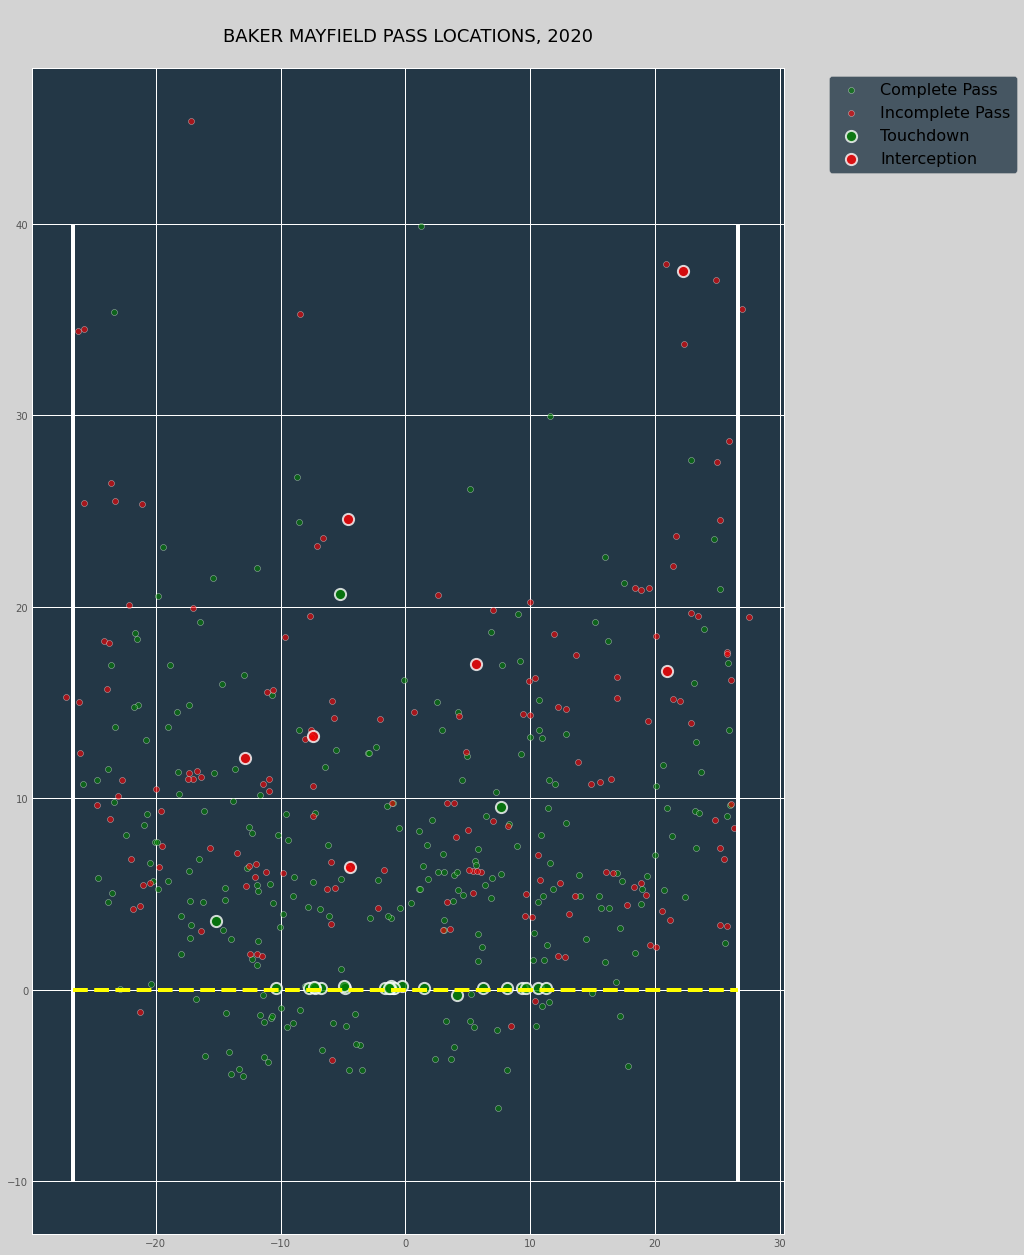

In [184]:
plot_passes(player_name='Baker Mayfield', year=2020)

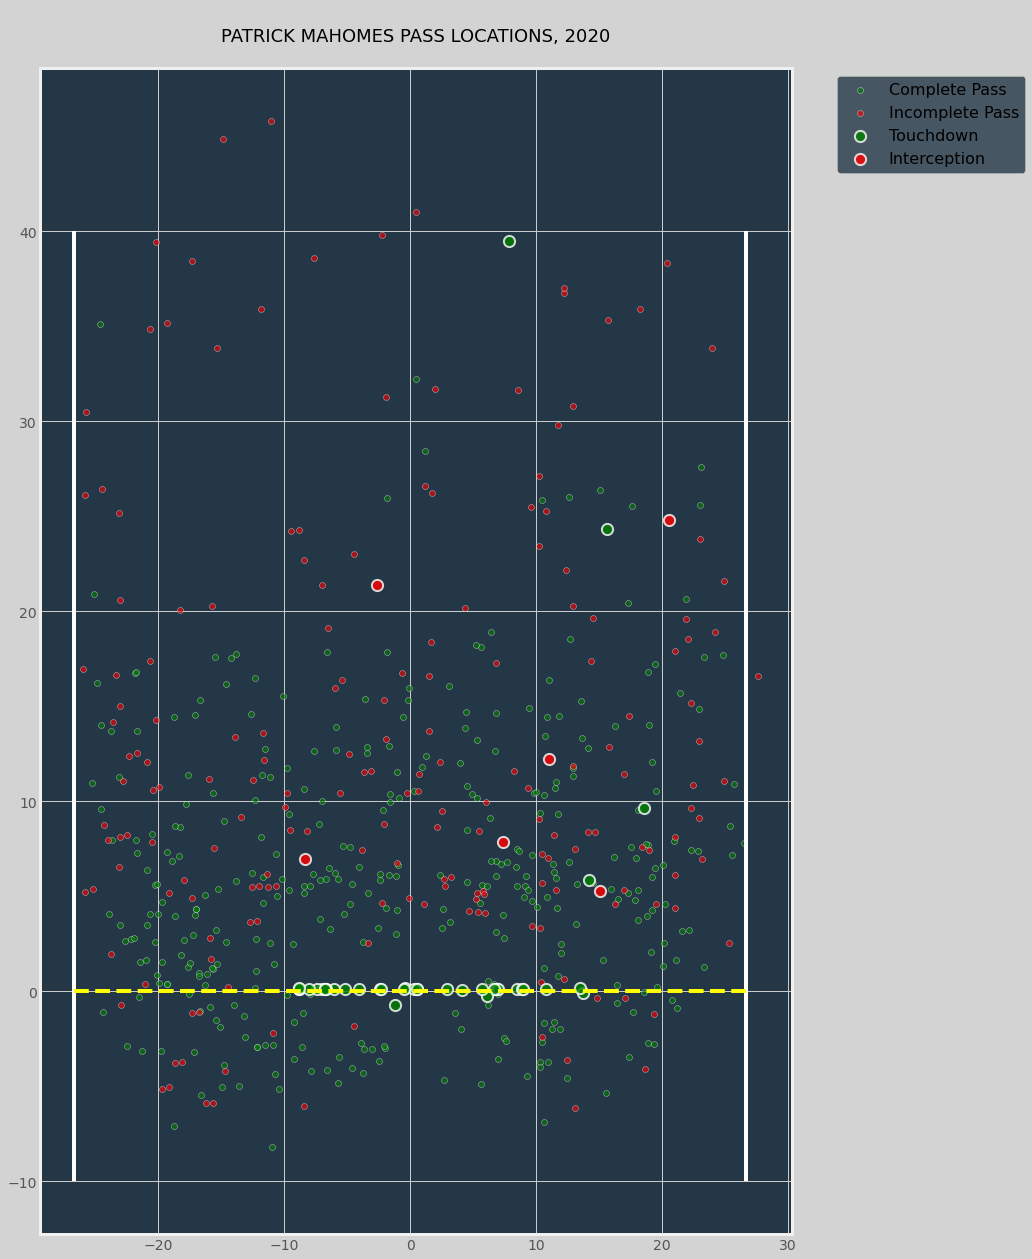

In [185]:
plot_passes(player_name='Patrick Mahomes', year=2020)

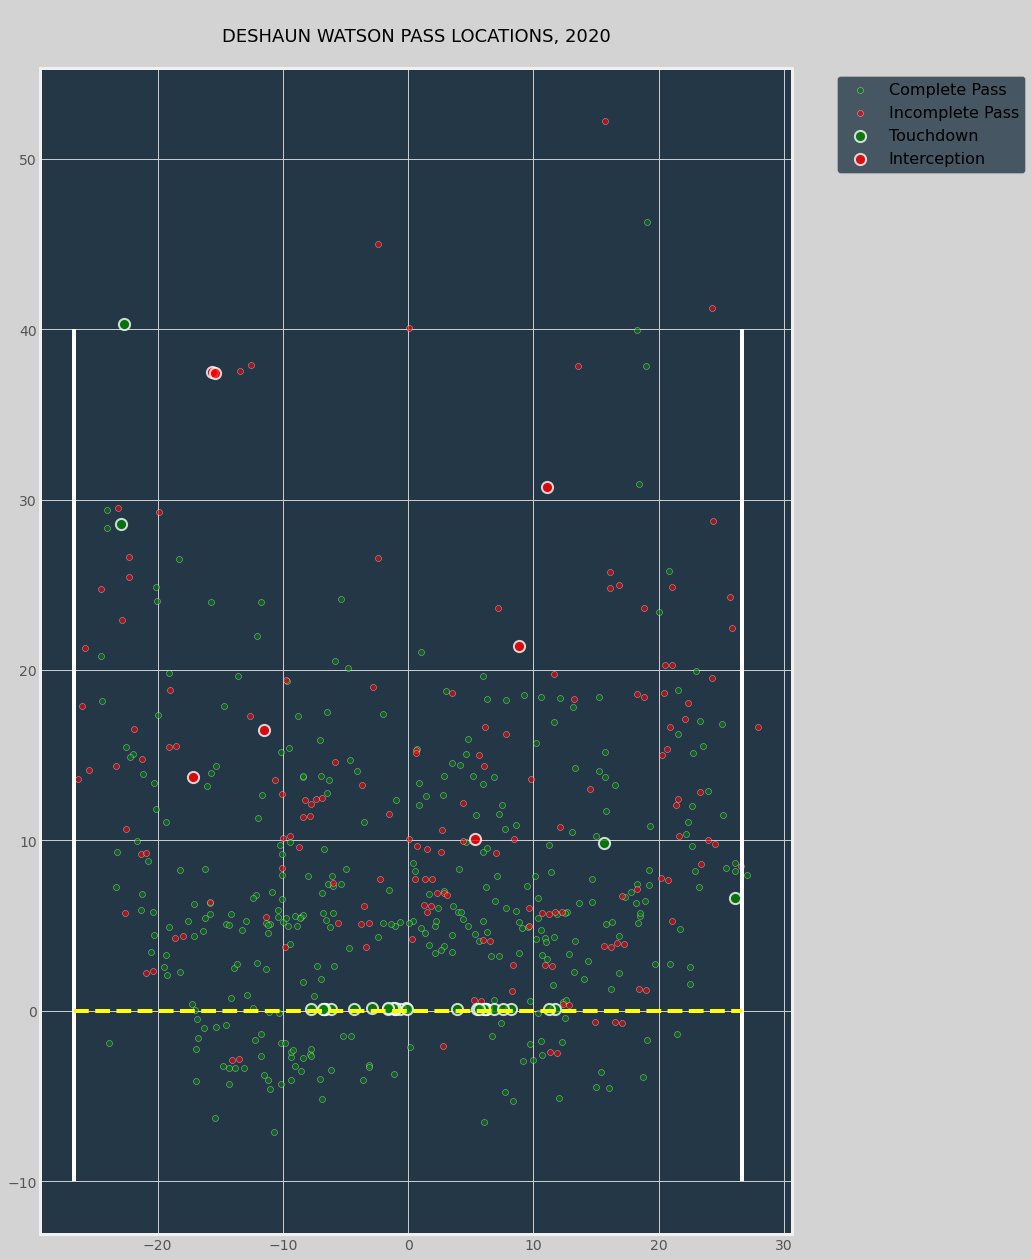

In [186]:
plot_passes(player_name='Deshaun Watson', year=2020)

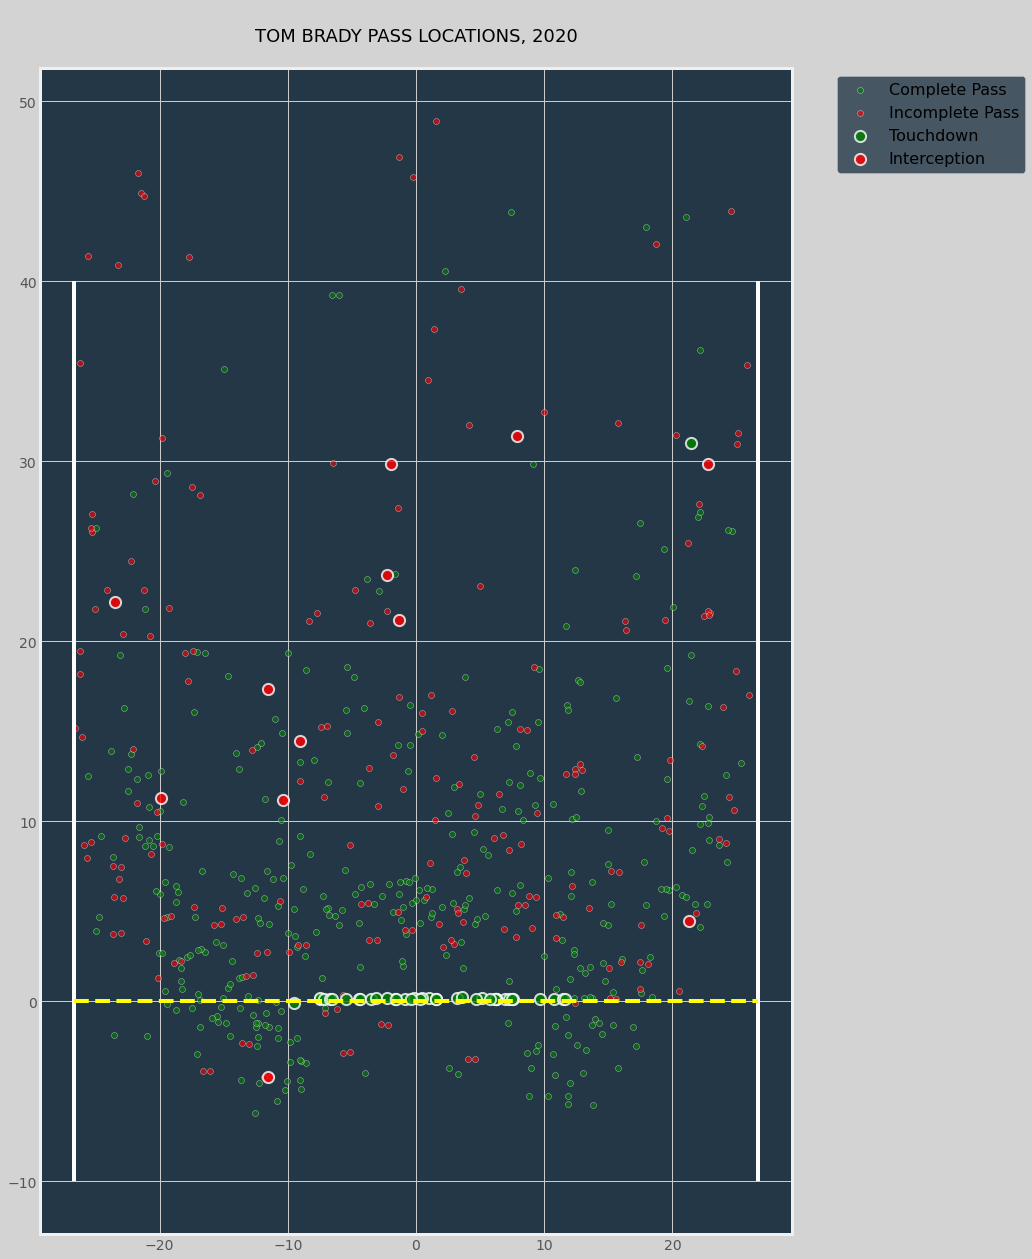

In [187]:
plot_passes(player_name='Tom Brady', year=2020)

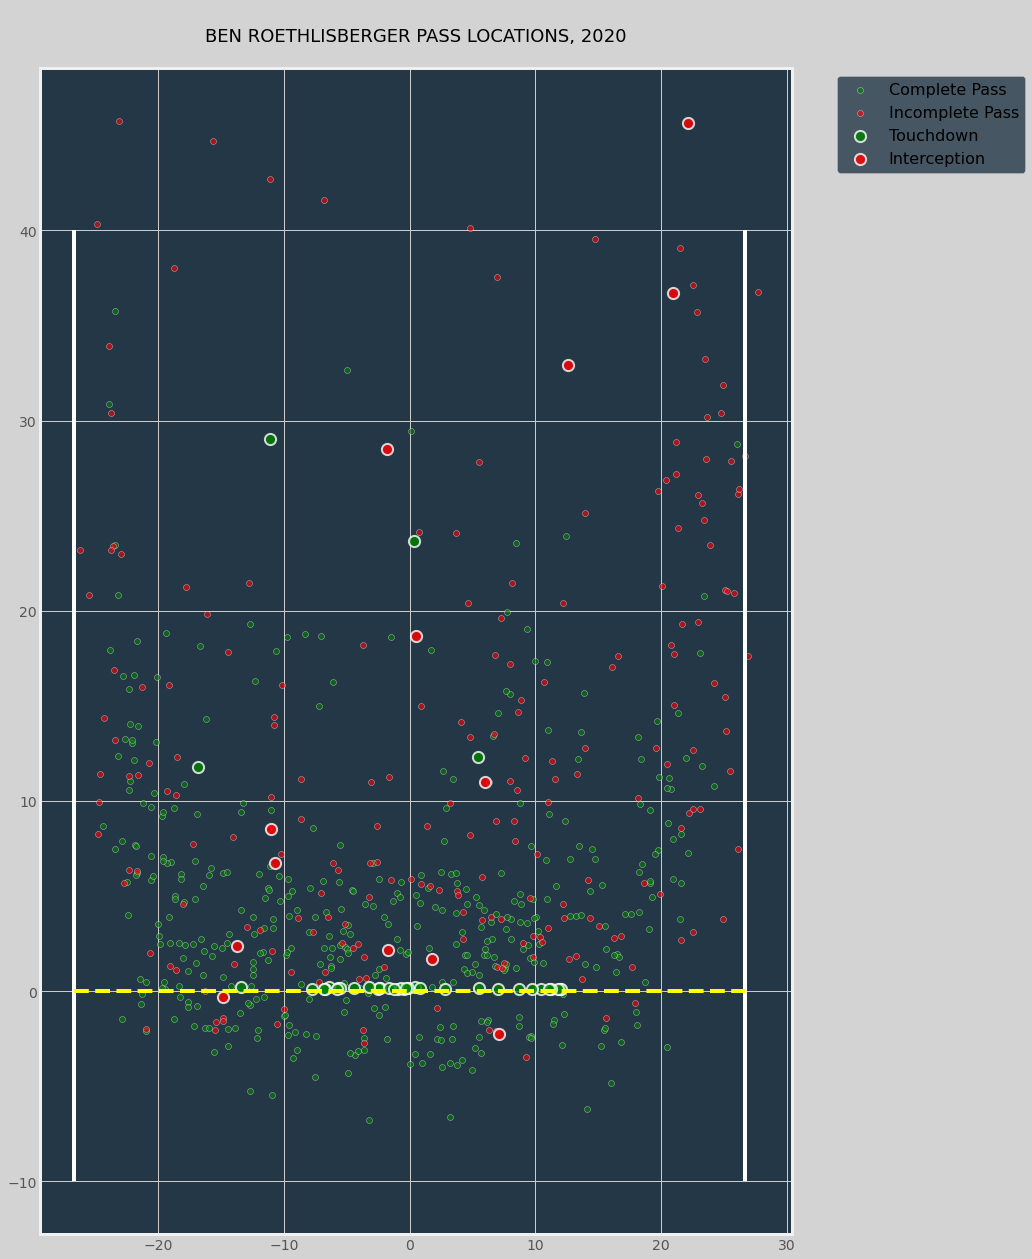

In [188]:
plot_passes(player_name='Ben Roethlisberger', year=2020)